<a href="https://colab.research.google.com/github/sweet-cross/plots-model-comparison/blob/main/cross_comparison_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import subprocess
import sys

# If it is run for the first time, we need install the repo and restart the notebook
result = subprocess.run(
    ['git',
     'clone',
     'https://github.com/sweet-cross/plots-model-comparison',
     '/content/plots-model-comparison'],
    capture_output=True,
    text=True
)

# Check if successful (exit code 0 means success)
if result.returncode == 0:
    # install missing fonts
    subprocess.run(['apt-get', 'update'], capture_output=False, text=False)
    subprocess.run(['apt-get', 'install', "-y", "fonts-liberation"], capture_output=False, text=False)
    print("⚠️ Please restart the runtime to use the cloned repository.")
    print("   Go to: Runtime → Restart Session")
else:
    # add the package to the path
    sys.path.insert(0,'/content/plots-model-comparison')
    from cross_tools.plots import Plots

### initialize the plotting tool

In [5]:
#  List of files with:
# name: name to be displayed in the plots
# id:  model_id in CROSSHub
# summer: name of the summer day reported by the model
# summerDay: data of the summer typical day in the format dd.mm.yyyy
# winter: name of the winter day reported by the model
# winterDay: data of the winter typical day in the format dd.mm.yyyy
# color: color used for the scatter plots in hex

# color: color to be used for the model in scatter plots
model_list =  [
          #{'name': 'Calliope', 'file': 'resultsCross_Calliope','summer':'Jul 20','winter':'Feb 08','color':'#D57CBE'},
          #{'name': 'Expanse', 'file': 'resultsCross_Expanse','summer':'Jul 02','winter':'Jan 01','color':'#FF7D0D'},
           #{'name': 'Nexus-e+\nEP2050+', 'file': 'resultsCross_Nexuse-EP','summer':'Jul 02','winter':'Feb 08','color':'#BCBD21'},
          {'name': 'SecMod', 'id': 'secmod','summer':'Typical day','summerDay':'01.07.2050','winter':'Typical day','winterDay':'01.02.2050','color':'#9565BD'},
          #{'name': 'SES', 'file': 'resultsCross_SES-epfl','summer':'Typical day','winter':'Typical day','color':'#1E75B3'},
          {'name': 'SES-ETH', 'id': 'seseth','summer':'Typical day','summerDay':'01.07.2050','winter':'Typical day','winterDay':'01.02.2050','color':'#2A9E2A'},
          {'name': 'STEM', 'id': 'stem','summer':'Week day','summerDay':'01.07.2050','winter':'Week day','winterDay':'01.02.2050','color':'#D52426'},
          {'name': 'ZEN-Garden','id':'zengarden', 'summer':'Week day','summerDay':'01.07.2050','winter':'Week day','winterDay':'01.02.2050','color':'#00BFC4'},
         #{'name': 'Empa', 'file': 'resultsCross_VSE','summer':'Jul 11','winter':'Feb 15','color':'#8B5349'},
          #{'name': 'EP2050+\nZero Basis', 'file': 'resultsCross_EP','summer':'avg. Aug. 13-19','winter':'avg. Feb. 7-13','color':'#7F7F7F'}
          ]

# Create the object that produces the plots and processes the data
# Name of the csv file with the results
fileResults = "/content/plots-model-comparison/results/results_20251125"
# Scenario names and corresponding colors
sce = ['abroad-res-full','abroad-res-lim','domestic-res-full','domestic-res-lim','abroad-nores-full','abroad-nores-lim','domestic-nores-full','domestic-nores-lim',]
sceColors = ['#9FBA3D','#E9442E','#EC9235','#3F89BD','#8E44AD','#1ABC9C','#F1C40F','#34495E']
# Folders where the plots will be created
folder_plots='/content/plots-model-comparison/plots'

cross_plots = Plots(fileResults,model_list,sce,sceColors,folder_plots)

=== Plots object initialized ===

Attributes:
  models: dict
  modelsid: list
  model_colors: list
  typicalDays: dict
  folder_plots: str
  allData: DataFrame
  yearsModel: dict
  sce: list
  sceColors: list
  sceModel: dict
  annualData: DataFrame

Methods:
  getReportedScenariosByModel()
  getReportedYearsByModel()
  plotBar()
  plotHourProfileTech()
  plotHourlyStack()
  plotScatter()
  plotTechDist()




### Annual electricity supply with net imports - scatter plot by model

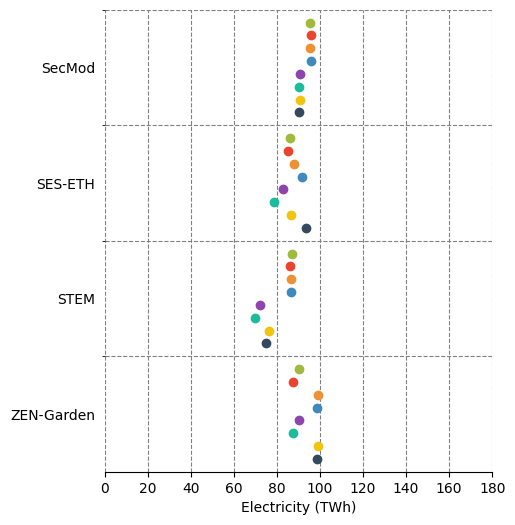

In [6]:
listModels = cross_plots.modelsid #any model can be excluded, the list should include the model ids
varName = 'electricity_supply'
use_technology_fuel = 'total'
scale = 1
xlabel = 'Electricity (TWh)'
xmax = 180
fileName = 'elecSupply_aver.pdf'
year = '2050'

cross_plots.plotScatter(listModels,varName ,use_technology_fuel,year,scale,xlabel,xmax,fileName)

### Annual electricity supply with total imports - bar plot by model and technology

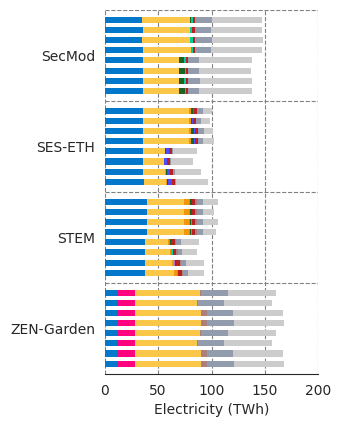

In [7]:
# name: name of the technology or group of technologies (valid names: https://sweet-cross.github.io/instructions-data/docs/sets/tech_generation/)
# data: list with the technologies that correspond to this category
# color: color to use for this category
varList_supply = [
    {'name':'Hydro','data':['hydro_dam','hydro_ror'],'color':'#0377CA'},
    {'name':'Nuclear','data':['nuclear'],'color':'#FF007F'},
    {'name':'Solar','data':['spv'],'color':'#FAC748'},
    {'name':'Wind','data':['wind'],'color':'#F2960E'},
    {'name':'Geothermal','data':['geothermal_pp'],'color':'#ac79c4'},
    {'name':'Methane','data':["methane_pp",'fuel_cell_methane'],'color':'#1f6228'},
    {'name':'Hydrogen','data':['hydrogen_pp','fuel_cell_h2'],'color':'#03CBA0'},
    {'name':'Liquids','data':['liquids_pp'],'color':'#4B4EFC'},
    {'name':'Waste','data':['waste_pp'],'color':'#b82222'},
    {'name':'Wood','data':['wood_pp'],'color':'#a9807c'},
    {'name':'Storage','data':['battery_out','phs_out'],'color':'#939CAC'},
    {'name':'Imports','data':['imports'],'color':'#CCCCCC'}
   ]


# Electricity supply bar plot
varName = 'electricity_supply'
listModels = cross_plots.modelsid
scale = 1
xlabel = 'Electricity (TWh)'
xmax = 200
fileName = 'elecSupply_tech.pdf'
right = False #True if model names have to go on the right
legend = False # True if legend has to be displayed
pos_legend = 'lower right' # Options are 'upper left', 'upper right', 'lower left', 'lower right'
onTopVarName = '' # name of variable to plot on top of the bar plot, '' if none, 'total': plots the total
year = '2050'
height=12
width=7

cross_plots.plotBar(listModels,varName ,varList_supply,year,scale,xlabel,xmax,fileName,right,legend,pos_legend,onTopVarName,width,height)


### Annual electricity supply with total imports - bar plot by model and technology

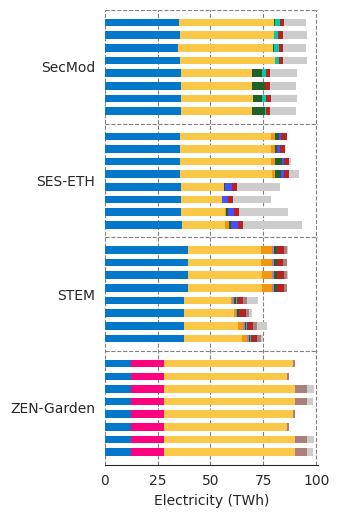

In [8]:
# name: name of the technology or group of technologies (valid names: https://sweet-cross.github.io/instructions-data/docs/sets/tech_generation/)
# data: list with the technologies that correspond to this category
# color: color to use for this category
varList_supply_net = [
    {'name':'Hydro','data':['hydro_dam','hydro_ror'],'color':'#0377CA'},
    {'name':'Nuclear','data':['nuclear'],'color':'#FF007F'},
    {'name':'Solar','data':['spv'],'color':'#FAC748'},
    {'name':'Wind','data':['wind'],'color':'#F2960E'},
    {'name':'Geothermal','data':['geothermal_pp'],'color':'#ac79c4'},
    {'name':'Methane','data':["methane_pp",'fuel_cell_methane'],'color':'#1f6228'},
    {'name':'Hydrogen','data':['hydrogen_pp','fuel_cell_h2'],'color':'#03CBA0'},
    {'name':'Liquids','data':['liquids_pp'],'color':'#4B4EFC'},
    {'name':'Waste','data':['waste_pp'],'color':'#b82222'},
    {'name':'Wood','data':['wood_pp'],'color':'#a9807c'},
    {'name':'Storage','data':['net_storage_out'],'color':'#939CAC'},
    {'name':'Net-imports','data':['net_imports'],'color':'#CCCCCC'}
   ]

varName = 'electricity_supply'
listModels = cross_plots.modelsid
scale = 1
xlabel = 'Electricity (TWh)'
xmax = 101
fileName = 'elecSupply_tech_net.pdf'
right = False #True if model names have to go on the right
legend = False # True if legend has to be displayed
pos_legend = 'lower right' # Options are 'upper left', 'upper right', 'lower left', 'lower right'
onTopVarName = ''# 'total'
year = '2050'
height=15
width=7

cross_plots.plotBar(listModels,varName ,varList_supply_net,year,scale,xlabel,xmax,fileName,right,legend,pos_legend,onTopVarName,width,height)


### Annual electricity supply - box plot by technology

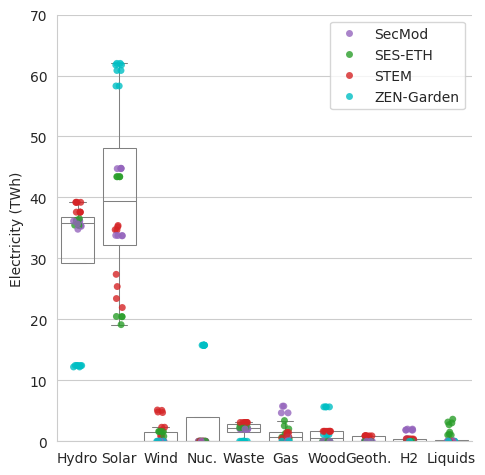

In [9]:
# name: name of the technology or group of technologies (valid names: https://sweet-cross.github.io/instructions-data/docs/sets/tech_generation/)
# data: list with the technologies that correspond to this category
varList_supply = [
    {'name':'Hydro','data':['hydro_dam','hydro_ror'],'color':'#0377CA'},
    {'name':'Nuc.','data':['nuclear'],'color':'#FF007F'},
    {'name':'Solar','data':['spv'],'color':'#FAC748'},
    {'name':'Wind','data':['wind'],'color':'#F2960E'},
    {'name':'Geoth.','data':['geothermal_pp'],'color':'#ac79c4'},
    {'name':'Gas','data':["methane_pp",'fuel_cell_methane'],'color':'#1f6228'},
    {'name':'H2','data':['hydrogen_pp','fuel_cell_h2'],'color':'#03CBA0'},
    {'name':'Liquids','data':['liquids_pp'],'color':'#4B4EFC'},
    {'name':'Waste','data':['waste_pp'],'color':'#b82222'},
    {'name':'Wood','data':['wood_pp'],'color':'#a9807c'},
    ]

varName = 'electricity_supply'
listModels = cross_plots.modelsid
order = ["Hydro",'Solar','Wind','Nuc.','Waste','Gas','Wood','Geoth.','H2','Liquids']
ylabel = 'Electricity (TWh)'
ymax = 70
fileName = 'elecDist_tech.pdf'
year = '2050'
legend = False

cross_plots.plotTechDist(listModels,varName,varList_supply,year,order,ylabel,ymax,fileName,legend)

### Annual electricity use with total exports - bar plot by model and use

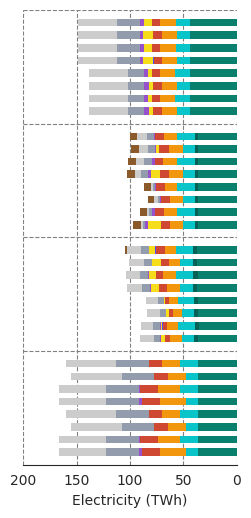

In [10]:
# Available variables: https://sweet-cross.github.io/instructions-data/docs/sets/use_elec/

varList_use = [
#    {'name':'Total','data':['Electricity-consumption|Total demand'],'color':'#8E8900'},
    {'name':'Base','data':['elec_appliances'],'color':'#097F6D'},
    {'name':'Trains','data':['passenger_rail','freight_rail'],'color':'#066256'},
    {'name':'Road transport','data':['road_public','road_private','truck','ldv'],'color':'#09c5c9'},
    {'name':'Space heating','data':['space_heating_boiler_electrode','space_heating_heater_elec','space_heating_heat_pump'],'color':'#F2960E'},
    {'name':'Process heat','data':['process_heat_boiler_electrode','process_heat_heater_elec','process_heat_heat_pump'],'color':'#CF4832'},
    {'name':'Power to liquids','data':['power_to_liquid'],'color':'#4B4EFC'},
    {'name':'Electrolysis','data':['electrolysis'],'color':'#F5DD1B'},
    {'name':'CCS','data':['dac'],'color':'#9751CB'},
    {'name':'Storage','data':['battery_in','phs_in'],'color':'#939CAC'},
    {'name':'Exports','data':['exports'],'color':'#CCCCCC'},
    {'name':'Losses','data':['grid_losses'],'color':'#8B5A2B'}
    ]

varName = 'electricity_consumption'
listModels = cross_plots.modelsid
scale = 1
xlabel = 'Electricity (TWh)'
xmax = 200
fileName = 'elecUse.pdf'
right = True #True if model names have to go on the right
legend = False # True if legend has to be displayed
pos_legend = 'lower left' # Options are 'upper left', 'upper right', 'lower left', 'lower right'
onTopVarName = ''
year = '2050'
height=15
width=7

cross_plots.plotBar(listModels,varName ,varList_use,year,scale,xlabel,xmax,fileName,right,legend,pos_legend,onTopVarName,width,height)


### Annual electricity use with net exports - bar plot by model and use

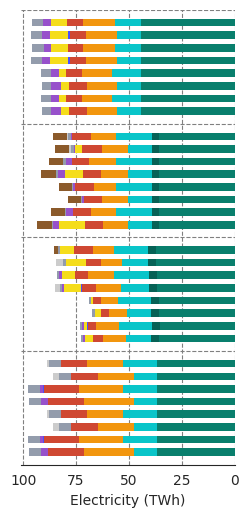

In [11]:
# Available variables: https://sweet-cross.github.io/instructions-data/docs/sets/use_elec/
varList_use_net = [
    {'name':'Base','data':['elec_appliances'],'color':'#097F6D'},
    {'name':'Trains','data':['passenger_rail','freight_rail'],'color':'#066256'},
    {'name':'Road transport','data':['road_public','road_private','truck','ldv'],'color':'#09c5c9'},
    {'name':'Space heating','data':['space_heating_boiler_electrode','space_heating_heater_elec','space_heating_heat_pump'],'color':'#F2960E'},
    {'name':'Process heat','data':['process_heat_boiler_electrode','process_heat_heater_elec','process_heat_heat_pump'],'color':'#CF4832'},
    {'name':'Power to liquids','data':['power_to_liquid'],'color':'#4B4EFC'},
    {'name':'Electrolysis','data':['electrolysis'],'color':'#F5DD1B'},
    {'name':'Others','data':['dac','data_centers'],'color':'#9751CB'},
    {'name':'Storage','data':['net_storage_in'],'color':'#939CAC'},
    {'name':'Net-exports','data':['net_exports'],'color':'#CCCCCC'},
    {'name':'Losses','data':['grid_losses','storage_losses'],'color':'#8B5A2B'}
    ]

varName = 'electricity_consumption'
listModels = cross_plots.modelsid
scale = 1
xlabel = 'Electricity (TWh)'
xmax = 101
fileName = 'elecUse_net.pdf'
right = True #True if model names have to go on the right
legend = False # True if legend has to be displayed
pos_legend = 'lower left' # Options are 'upper left', 'upper right', 'lower left', 'lower right'
onTopVarName = ''
year = '2050'
height=15
width=7

cross_plots.plotBar(listModels,varName ,varList_use_net,year,scale,xlabel,xmax,fileName,right,legend,pos_legend,onTopVarName,width,height)


### Annual electricity supply - box plot by use

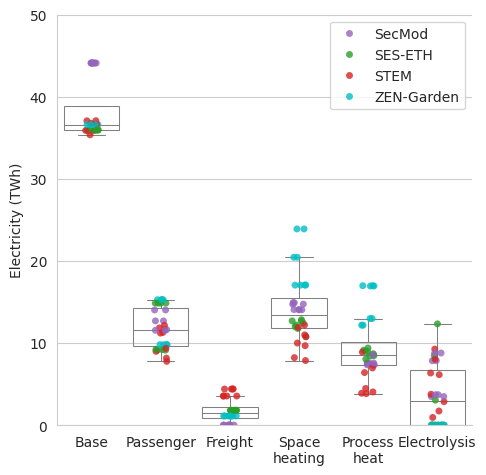

In [12]:
# Available variables: https://sweet-cross.github.io/instructions-data/docs/sets/use_elec/
varList_use_dist = [
    {'name':'Base','data':['elec_appliances'],'color':'#097F6D'},
    {'name':'Passenger','data':['road_public','road_private'],'color':'#09c5c9'},
    {'name':'Freight','data':['truck','ldv'],'color':'#09c5c9'},
    {'name':'Space\nheating','data':['space_heating_boiler_electrode','space_heating_heater_elec','space_heating_heat_pump'],'color':'#F2960E'},
    {'name':'Process\nheat','data':['process_heat_boiler_electrode','process_heat_heater_elec','process_heat_heat_pump'],'color':'#CF4832'},
    {'name':'Electrolysis','data':['electrolysis'],'color':'#F5DD1B'}
  ]

varName = 'electricity_consumption'
listModels = cross_plots.modelsid
order = ["Base",'Passenger','Freight','Space\nheating','Process\nheat','Electrolysis']
ylabel = 'Electricity (TWh)'
ymax =50
fileName = 'elecUseDist_use.pdf'
year = '2050'
legend = False

cross_plots.plotTechDist(listModels,varName,varList_use_dist,year,order,ylabel,ymax,fileName,legend)


### Hydrogen supply - Bar plot by model and technology

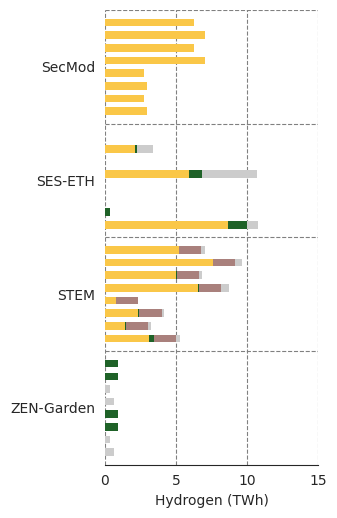

In [13]:
# Available variables: https://sweet-cross.github.io/instructions-data/docs/sets/tech_hydrogen/
varList_h2_supply = [
    {'name':'Electrolysis','data':['electrolyser'],'color':'#FAC748'},
    {'name':'Steam reforming','data':['steam_reforming'],'color':'#1f6228'},
    {'name':'Gasification','data':['wood_gasification_h2','waste_gasification_h2'],'color':'#a9807c'},
    {'name':'Pyrolysis','data':['methane_pyrolysis'],'color':'#A93226'},
    {'name':'Imports','data':['imports'],'color':'#CCCCCC'}
    ]

varName = 'h2_supply'
listModels = cross_plots.modelsid
xlabel = 'Hydrogen (TWh)'
xmax = 15
fileName = 'h2Supply_tech.pdf'
right = False #True if model names have to go on the right, it invers the axis
legend = False # True if legend has to be displayed
pos_legend = 'lower right' # Options are 'upper left', 'upper right', 'lower left', 'lower right'
onTopVarName = ''
year = '2050'
height=15
width=7
cross_plots.plotBar(listModels,varName ,varList_h2_supply,year,scale,xlabel,xmax,fileName,right,legend,pos_legend,onTopVarName,width,height)


### Hydrogen use - Bar plot by model and use

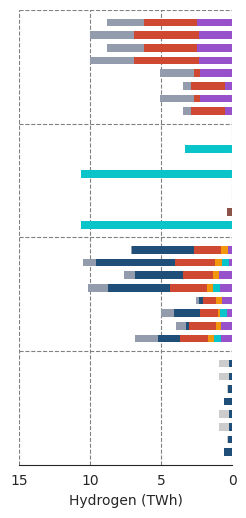

In [14]:
# Hydrogen consumption by use https://sweet-cross.github.io/instructions-data/docs/sets/use_hydrogen/

varList_h2_consump = [
    {'name':'Electricity','data':['hydrogen_pp','fuel_cell_h2'],'color':'#9751CB'},
    {'name':'Freight','data':['truck','ldv'],'color':'#8B5349'},
    {'name':'Passengers','data':['passenger_road_public','passenger_road_private'],'color':'#09c5c9'},
    {'name':'Space heating','data':['space_heating'],'color':'#F2960E'},
    {'name':'Process heat','data':['process_heat'],'color':'#CF4832'},
    {'name':'Fuel synthesis','data':['fuel_synthesis'],'color':'#1F4E79'},
     {'name':'Storage','data':['storage'],'color':'#939CAC'},
    {'name':'Exports','data':['exports'],'color':'#CCCCCC'}
    ]

varName = 'h2_fec'
listModels = cross_plots.modelsid
scale = 1
xlabel = 'Hydrogen (TWh)'
xmax = 15
fileName = 'h2Use.pdf'
right = True #True if model names have to go on the right, it invers the axis
legend = False # True if legend has to be displayed
pos_legend = 'lower left' # Options are 'upper left', 'upper right', 'lower left', 'lower right'
onTopVarName = ''
year = '2050'
height=15
width=7
cross_plots.plotBar(listModels,varName,varList_h2_consump,year,scale,xlabel,xmax,fileName,right,legend,pos_legend,onTopVarName,width,height)

### Methane supply - Bar plot by model and technology

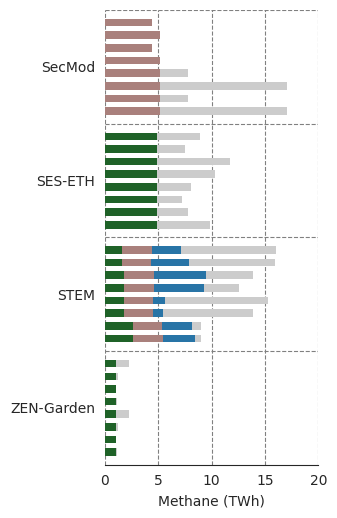

In [15]:
# Methane supply by technology  https://sweet-cross.github.io/instructions-data/docs/sets/tech_methane/
varList_methane_supply = [
    {'name':'Anaerobic digestion','data':['anaerobic_digestion'],'color':'#1f6228'},
    {'name':'Gasification','data':['wood_gasification_methane','waste_gasification_methane'],'color':'#a9807c'},
    {'name':'Methanation','data':['methanation'],'color':'#2874A6'},
    {'name':'Imports','data':['imports_methane','imports_gas'],'color':'#CCCCCC'}
    ]

varName = 'methane_supply'
listModels = cross_plots.modelsid
xlabel = 'Methane (TWh)'
xmax = 20
fileName = 'methaneSupply_tech.pdf'
right = False #True if model names have to go on the right, it invers the axis
legend = False # True if legend has to be displayed
pos_legend = 'lower right' # Options are 'upper left', 'upper right', 'lower left', 'lower right'
onTopVarName = ''
year = '2050'
height=15
width=7
cross_plots.plotBar(listModels,varName ,varList_methane_supply,year,scale,xlabel,xmax,fileName,right,legend,pos_legend,onTopVarName,width,height)


### Methane use - Bar plot by model and use

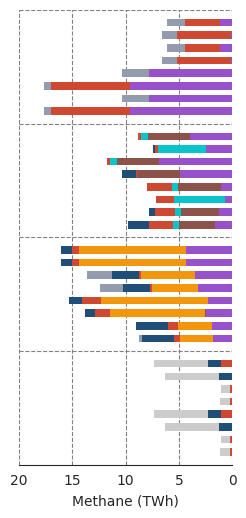

In [16]:
# Methane consumption by use https://sweet-cross.github.io/instructions-data/docs/sets/use_methane/

varList_methane_consump = [
    {'name':'Electricity','data':['elec_generation'],'color':'#9751CB'},
    {'name':'Freight','data':['truck','ldv'],'color':'#8B5349'},
    {'name':'Passengers','data':['passenger_road_public','passenger_road_private'],'color':'#09c5c9'},
    {'name':'Space heating','data':['space_heating'],'color':'#F2960E'},
    {'name':'Process heat','data':['process_heat'],'color':'#CF4832'},
    {'name':'Fuel syntheis','data':['fuel_synthesis'],'color':'#1F4E79'},
     {'name':'Storage','data':['storage'],'color':'#939CAC'},
    {'name':'Exports','data':['exports'],'color':'#CCCCCC'}
    ]

varName = 'methane_fec'
listModels = cross_plots.modelsid
scale = 1
xlabel = 'Methane (TWh)'
xmax = 20
fileName = 'methaneUse.pdf'
right = True #True if model names have to go on the right, it invers the axis
legend = False # True if legend has to be displayed
pos_legend = 'lower left' # Options are 'upper left', 'upper right', 'lower left', 'lower right'
onTopVarName = ''
year = '2050'

cross_plots.plotBar(listModels,varName,varList_methane_consump,year,scale,xlabel,xmax,fileName,right,legend,pos_legend,onTopVarName,width,height)

### Liquids supply - Bar plot by model and technology

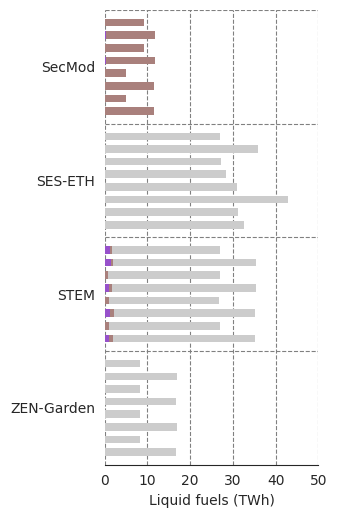

In [17]:
# Liquids supply by technology https://sweet-cross.github.io/instructions-data/docs/sets/tech_liquids/
varList_liquids_supply = [
        {'name':'Power-to-liquids','data':['power_to_liquid'],'color':'#9751CB'},
        {'name':'Liquefaction','data':['wood_liquefaction','waste_liquefaction'],'color':'#a9807c'},
        {'name':'Imports','data':['imports_diesel','imports_biodiesel'],'color':'#CCCCCC'}
        ]

varName = 'liquids_supply'
listModels = cross_plots.modelsid
xlabel = 'Liquid fuels (TWh)'
xmax = 50
fileName = 'liquidsSupply_tech.pdf'
right = False #True if model names have to go on the right, it invers the axis
legend = False # True if legend has to be displayed
pos_legend = 'upper right' # Options are 'upper left', 'upper right', 'lower left', 'lower right'
onTopVarName = ''
year = '2050'
height=15
width=7
cross_plots.plotBar(listModels,varName ,varList_liquids_supply,year,scale,xlabel,xmax,fileName,right,legend,pos_legend,onTopVarName,width,height)


### Liquids use - Bar plot by model and use

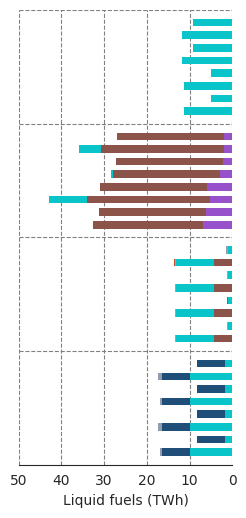

In [18]:
# Liquids consumption by use https://sweet-cross.github.io/instructions-data/docs/sets/use_liquids/

varList_liquids_consump = [
    {'name':'Electricity','data':['elec_generation'],'color':'#9751CB'},
    {'name':'Freight','data':['truck','ldv'],'color':'#8B5349'},
    {'name':'Passengers','data':['passenger_road_public','passenger_road_private'],'color':'#09c5c9'},
    {'name':'Space heating','data':['space_heating'],'color':'#F2960E'},
    {'name':'Process heat','data':['process_heat'],'color':'#CF4832'},
    {'name':'Fuel syntheis','data':['fuel_synthesis'],'color':'#1F4E79'},
     {'name':'Storage','data':['storage'],'color':'#939CAC'},
    {'name':'Exports','data':['exports'],'color':'#CCCCCC'}
    ]

varName = 'liquids_fec'
listModels = cross_plots.modelsid
scale = 1
xlabel = 'Liquid fuels (TWh)'
xmax = 50
fileName = 'liquidsUse.pdf'
right = True #True if model names have to go on the right, it invers the axis
legend = False # True if legend has to be displayed
pos_legend = 'upper left' # Options are 'upper left', 'upper right', 'lower left', 'lower right'
onTopVarName = ''
year = '2050'
height=15
width=7
cross_plots.plotBar(listModels,varName,varList_liquids_consump,year,scale,xlabel,xmax,fileName,right,legend,pos_legend,onTopVarName,width,height)


### Space heating supply - Bar plot by technology

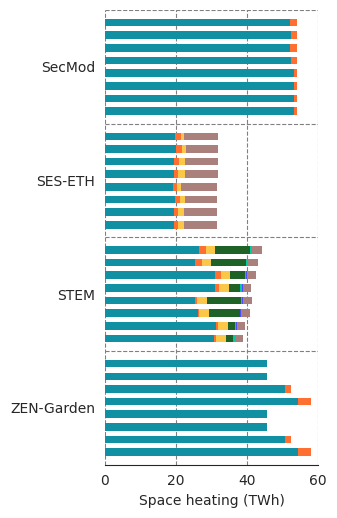

In [19]:
# Space heating supply by technology https://sweet-cross.github.io/instructions-data/docs/sets/tech_heat/

varList_spaceHeat = [
    {'name':'Heat pumps','data':['heat_pump'],'color':'#1290A3'},
    {'name':'Heaters','data':['heater_elec','boiler_electrode'],'color':'#FF6F31'},
    {'name':'Solar','data':['solar_thermal'],'color':'#FAC748'},
    {'name':'Geothermal','data':['geothermal_heat'],'color':'#9467BD'},
    {'name':'Methane','data':['boiler_methane','chp_methane'],'color':'#1f6228'},
    {'name':'Hydrogen','data':['boiler_h2','chp_h2'],'color':'#03CBA0'},
    {'name':'Liquids','data':['boiler_liquids','chp_liquids'],'color':'#4B4EFC'},
    {'name':'Waste','data':['boiler_waste','chp_waste'],'color':'#b82222'},
    {'name':'Wood','data':['boiler_wood','chp_wood'],'color':'#a9807c'},
    {'name':'District Heating','data':['district_heating'],'color':'#CCCCCC'},
    ]


varName = 'space_heat_useful_energy_supply'
listModels = cross_plots.modelsid
scale = 1
xlabel = 'Space heating (TWh)'
xmax = 60
fileName = 'spaceHeating.pdf'
right = False #True if model names have to go on the right, it invers the axis
legend = False # True if legend has to be displayed
pos_legend = 'upper right' # Options are 'upper left', 'upper right', 'lower left', 'lower right'
onTopVarName = ''
year = '2050'
height=15
width=7
cross_plots.plotBar(listModels,varName,varList_spaceHeat,year,scale,xlabel,xmax,fileName,right,legend,pos_legend,onTopVarName,width,height)



### Space heating supply - box plot by technology

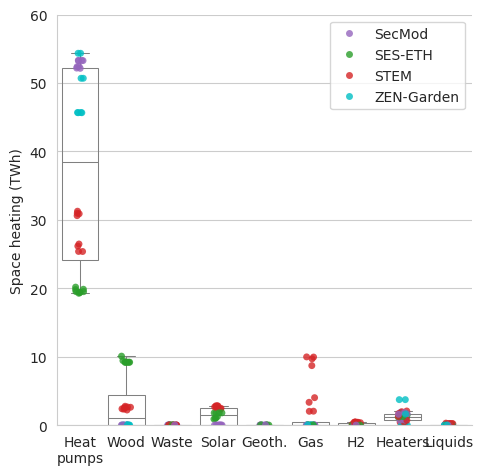

In [20]:
varList_dist_spaceheat = [
    {'name':'Heat\npumps','data':['heat_pump'],'color':'#1290A3'},
    {'name':'Heaters','data':['heater_elec','boiler_electrode'],'color':'#FF6F31'},
    {'name':'Solar','data':['solar_thermal'],'color':'#FAC748'},
    {'name':'Geoth.','data':['geothermal_heat'],'color':'#9467BD'},
    {'name':'Gas','data':['boiler_methane','chp_methane'],'color':'#1f6228'},
    {'name':'H2','data':['boiler_h2','chp_h2'],'color':'#03CBA0'},
    {'name':'Liquids','data':['boiler_liquids','chp_liquids'],'color':'#4B4EFC'},
    {'name':'Waste','data':['boiler_waste','chp_waste'],'color':'#b82222'},
    {'name':'Wood','data':['boiler_wood','chp_wood'],'color':'#a9807c'},
    ]

varName = 'space_heat_useful_energy_supply'
listModels = cross_plots.modelsid
order = ["Heat\npumps",'Wood','Waste','Solar','Geoth.','Gas','H2','Heaters','Liquids']
ylabel = 'Space heating (TWh)'
ymax = 60
fileName = 'spaceHeating_dist.pdf'
legend = False
year = '2050'

cross_plots.plotTechDist(listModels,varName,varList_dist_spaceheat,year,order,ylabel,ymax,fileName,legend)


### Process heat supply - Bar plot by technology

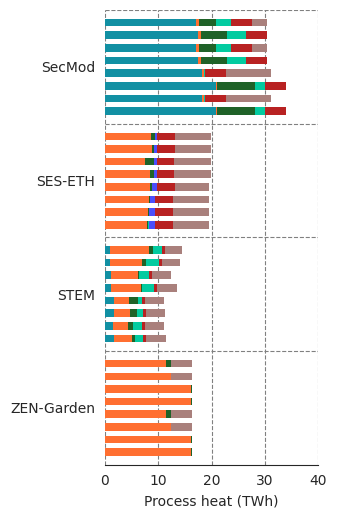

In [21]:
varList_indHeat = [
    {'name':'Heat pumps','data':['heat_pump'],'color':'#1290A3'},
    {'name':'Heaters','data':['heater_elec','boiler_electrode'],'color':'#FF6F31'},
    {'name':'Solar','data':['solar_thermal'],'color':'#FAC748'},
    {'name':'Geothermal','data':['geothermal_heat'],'color':'#9467BD'},
    {'name':'Methane','data':['boiler_methane','chp_methane'],'color':'#1f6228'},
    {'name':'Hydrogen','data':['boiler_h2','chp_h2'],'color':'#03CBA0'},
    {'name':'Liquids','data':['boiler_liquids','chp_liquids'],'color':'#4B4EFC'},
    {'name':'Waste','data':['boiler_waste','chp_waste'],'color':'#b82222'},
    {'name':'Wood','data':['boiler_wood','chp_wood'],'color':'#a9807c'},
    ]

varName = 'process_heat_useful_energy_production'
listModels = cross_plots.modelsid
scale = 1
xlabel = 'Process heat (TWh)'
xmax = 40
fileName = 'processHeating.pdf'
right = False #True if model names have to go on the right, it invers the axis
legend = False # True if legend has to be displayed
pos_legend = 'lower right' # Options are 'upper left', 'upper right', 'lower left', 'lower right'
onTopVarName = ''
year = '2050'
height=15
width=7
cross_plots.plotBar(listModels,varName,varList_indHeat,year,scale,xlabel,xmax,fileName,right,legend,pos_legend,onTopVarName,width,height)


### Process heat supply - box plot by technology

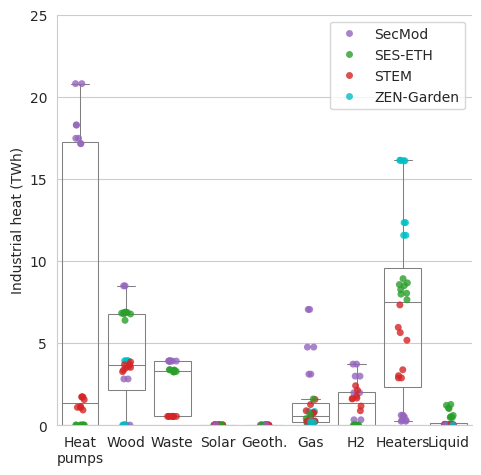

In [22]:

# Industrial heat distribution by technology
varList_indHeat_dist = [
    {'name':'Heat\npumps','data':['heat_pump'],'color':'#1290A3'},
    {'name':'Heaters','data':['heater_elec','boiler_electrode'],'color':'#FF6F31'},
    {'name':'Solar','data':['solar_thermal'],'color':'#FAC748'},
    {'name':'Geoth.','data':['geothermal_heat'],'color':'#9467BD'},
    {'name':'Gas','data':['boiler_methane','chp_methane'],'color':'#1f6228'},
    {'name':'H2','data':['boiler_h2','chp_h2'],'color':'#03CBA0'},
    {'name':'Liquid','data':['boiler_liquids','chp_liquids'],'color':'#4B4EFC'},
    {'name':'Waste','data':['boiler_waste','chp_waste'],'color':'#b82222'},
    {'name':'Wood','data':['boiler_wood','chp_wood'],'color':'#a9807c'},
    ]

varName = 'process_heat_useful_energy_production'
listModels = cross_plots.modelsid
order = ["Heat\npumps",'Wood','Waste','Solar','Geoth.','Gas','H2','Heaters','Liquid']
ylabel = 'Industrial heat (TWh)'
ymax = 25
fileName = 'processHeating_dist.pdf'
legend = False
year = '2050'

cross_plots.plotTechDist(listModels,varName,varList_indHeat_dist,year,order,ylabel,ymax,fileName,legend)


### Transport supply - Bar plots by fuel

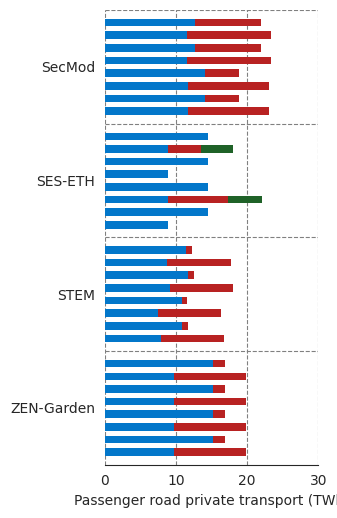

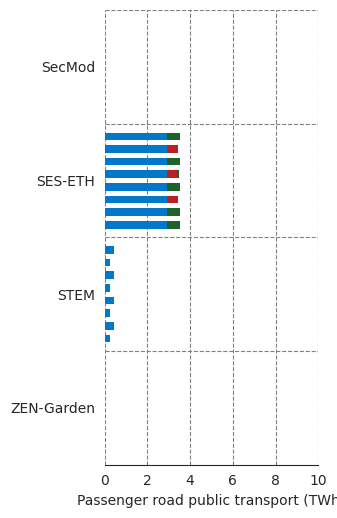

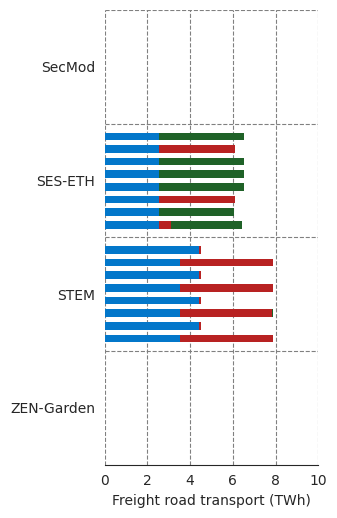

In [23]:
# Transport supply by technology

varList_transport = [
    {'name':'Electricity','data':['electricity'],'color':'#0377CA'},
    {'name':'Liquids','data':['oil','liquids'],'color':'#b82222'},
    {'name':'Biogas','data':['methane'],'color':'#1f6228'},
    {'name':'Hydrogen','data':['hydrogen'],'color':'#03CBA0'},
    ]

listModels = cross_plots.modelsid
scale = 1
right = False #True if model names have to go on the right, it invers the axis
legend = False # True if legend has to be displayed
pos_legend = 'lower right' # Options are 'upper left', 'upper right', 'lower left', 'lower right'
onTopVarName = ''
year = '2050'


varName = 'passenger_road_private_fec'
xlabel = 'Passenger road private transport (TWh)'
xmax = 30
fileName = 'passenger_road_private_fec.pdf'
height=15
width=7
cross_plots.plotBar(listModels,varName,varList_transport,year,scale,xlabel,xmax,fileName,right,legend,pos_legend,onTopVarName,width,height)


varName = 'passenger_road_public_fec'
xlabel = 'Passenger road public transport (TWh)'
xmax = 10
fileName = 'passenger_road_public_fec.pdf'
height=15
width=7
cross_plots.plotBar(listModels,varName,varList_transport,year,scale,xlabel,xmax,fileName,right,legend,pos_legend,onTopVarName,width,height)

varName = 'freight_road_fec'
xlabel = 'Freight road transport (TWh)'
xmax = 10
fileName = 'freight_road_fec.pdf'
height=15
width=7
cross_plots.plotBar(listModels,varName,varList_transport,year,scale,xlabel,xmax,fileName,right,legend,pos_legend,onTopVarName,width,height)


### Transport supply - Box plots by fuel

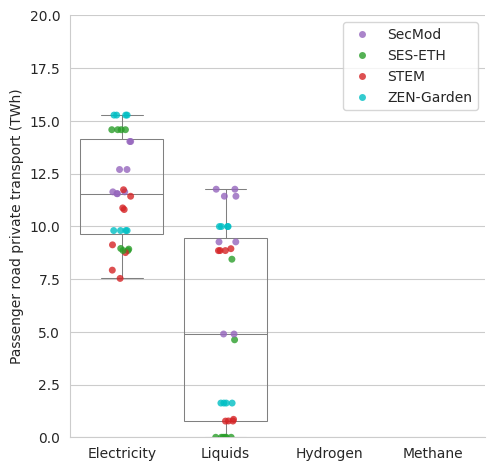

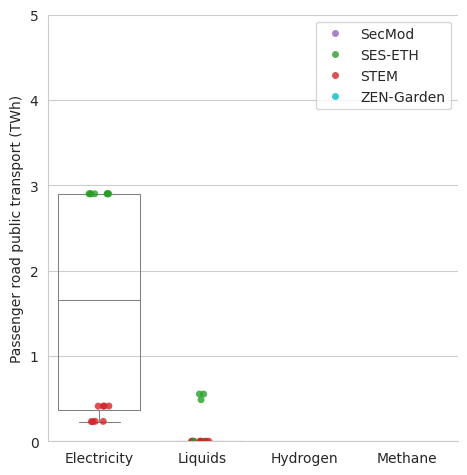

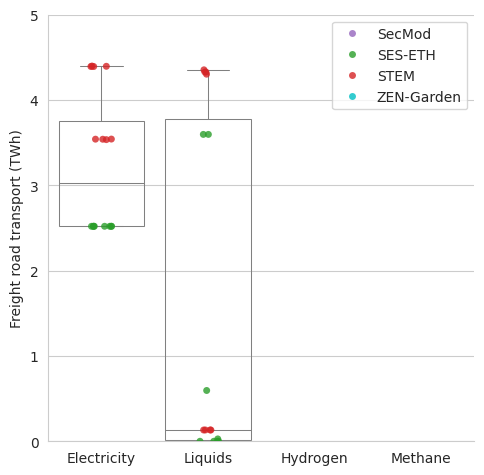

In [24]:
varList_transport = [
    {'name':'Electricity','data':['electricity'],'color':'#0377CA'},
    {'name':'Liquids','data':['oil','liquids'],'color':'#b82222'},
    {'name':'Biogas','data':['methane'],'color':'#1f6228'},
    {'name':'Hydrogen','data':['hydrogen'],'color':'#03CBA0'},
    ]

listModels = cross_plots.modelsid
order = ["Electricity",'Liquids','Hydrogen','Methane']
legend = False
year = '2050'

varName = 'passenger_road_private_fec'
ylabel = 'Passenger road private transport (TWh)'
ymax = 20
fileName = 'passenger_road_private_fec_dist.pdf'

cross_plots.plotTechDist(listModels,varName,varList_transport,year,order,ylabel,ymax,fileName,legend)

varName = 'passenger_road_public_fec'
ylabel = 'Passenger road public transport (TWh)'
ymax = 5
fileName = 'passenger_road_public_fec_dist.pdf'

cross_plots.plotTechDist(listModels,varName,varList_transport,year,order,ylabel,ymax,fileName,legend)

varName = 'freight_road_fec'
ylabel = 'Freight road transport (TWh)'
ymax = 5
fileName = 'freight_road_fec_dist.pdf'

cross_plots.plotTechDist(listModels,varName,varList_transport,year,order,ylabel,ymax,fileName,legend)